In [61]:
"""
Yuslen Lopez


"""
import numpy as np
import matplotlib.pyplot as plt


class NeuralNetwork():

    def __init__(self,num_params=2):

        np.random.seed(1), #generates the same weights in every turn 
        #3x1 weight matrix
        #np.random generates a rand number between 0-1
        self.weight_matrix = 2* np.random.random((num_params+1,1))-1

        self.l_rate=1

    #activation function
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    #forward propagation
    def forward_propagation(self, inputs):
        outs=np.dot(inputs,self.weight_matrix)
        return self.sigmoid(outs)

    #Training 
    def train_GDL(self, train_inputs,train_outputs,num_train_iterations=1000,lr=1):
        N=train_inputs.shape[0]
        self.l_rate=lr
        cost_func =np.array([])
        #iterations 
        for iteration in range (num_train_iterations):
            outputs = self.forward_propagation(train_inputs)
            #calculate error 
            error = train_outputs- outputs
            adjustment = (self.l_rate/N)*np.sum(np.multiply(error,train_inputs),axis=0)
            #calculate the cost function 
            cost_func = np.append(cost_func,(1/2*N)*np.sum(np.power(error,2)))
            #adjust the weight matrix
            self.weight_matrix[:,0]+=adjustment
            #plot the seperating line based on the weights 
            print('iteration #'+str(iteration))
            plot_fun_thr(train_inputs[:,1:3],train_outputs[:,0],self.weight_matrix[:,0],classes)
        plot_cost_func(cost_func,num_train_iterations)
    
    #predicting the classes of new data points 
    def pred(self,inputs):
        prob=self.forward_propagation(inputs)
        preds=np.int8(prob>=0.5)
        return preds


def plot_cost_func(J,iterations):
    #plotting the learning curve
    x=np.arange(iterations,dtype=int)
    y=J
    plt.plot(x,y)
    # plt.axis([-1,x.shape[0]+1,-1,np.max(y)+1])
    plt.title('learning curve')
    plt.xlabel('x:  iteration numer ')
    plt.ylabel('y:  J(0)')
    plt.show()

def plot_fun(features,labels,classes):
    plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1], 'rs',
             features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'g^')
    plt.axis([-1,2,-1,2])
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class'+str(classes[0]),'Class'+str(classes[1])])
    plt.show()
    
#plotting
def plot_fun_thr(features,labels,thre_parms,classes):
    #plotting the data points 
    plt.plot(features[labels[:]==classes[0],0],features[labels[:]==classes[0],1],'rs',
             features[labels[:]==classes[1],0],features[labels[:]==classes[1],1], 'g^')
    plt.axis([-1,2,-1,2])
    #plotting the seperating line 
    x1= np.linspace(-1,2,50)
    x2 = -(thre_parms[1]*x1+thre_parms[0])/thre_parms[2] #a X1 + B X2 + c=0 --> X2 = (-a X1 + c)/b
    plt.plot(x1,x2,'-r')
    plt.xlabel('x: feature 1')
    plt.ylabel('y: feature 2')
    plt.legend(['Class'+str(classes[0]),'Class'+str(classes[1])])
    #plt.pause(0,5)
    plt.show()







[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 0 0 1]


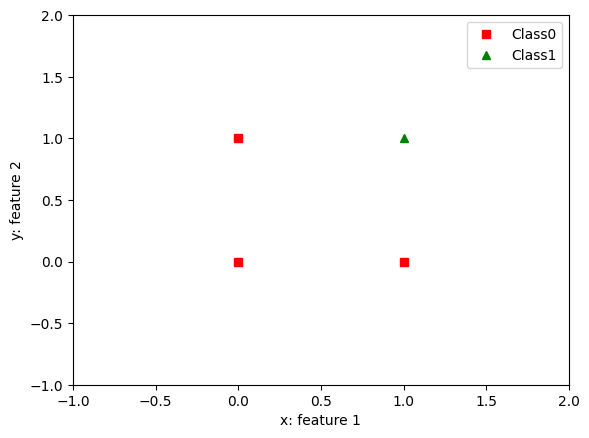

In [62]:
features=np.array([[0,0],[0,1],[1,0],[1,1]])
print(features)
labels=np.array([0,0,0,1])
print(labels)
classes=[0,1]

plot_fun(features,labels,classes)

In [63]:
bias = np.ones((features.shape[0],1)) 
features=np.append(bias,features,axis=1)
print('Features vector adding the bias')
print(features)
print(features.shape)

Features vector adding the bias
[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
(4, 3)


Random weights at the start of training
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
iteration #0


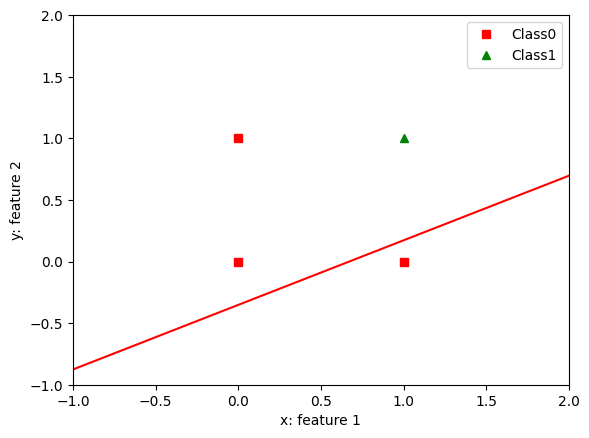

iteration #1


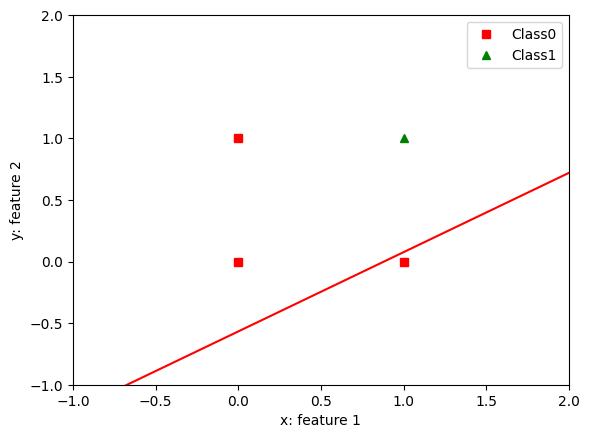

iteration #2


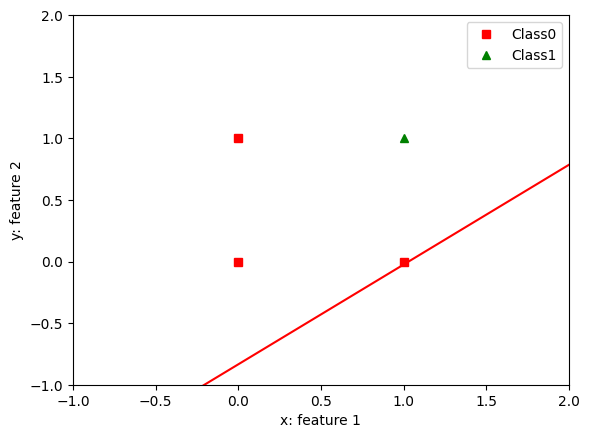

iteration #3


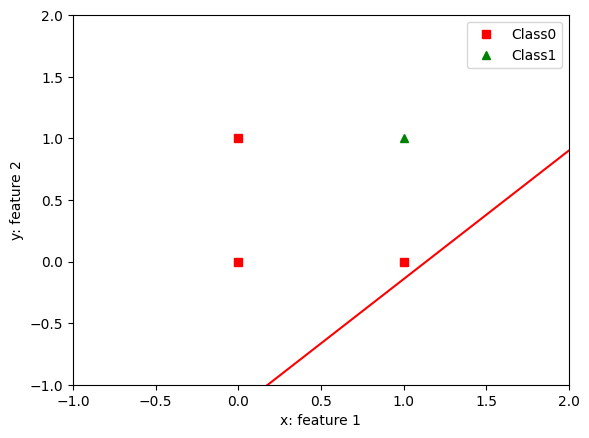

iteration #4


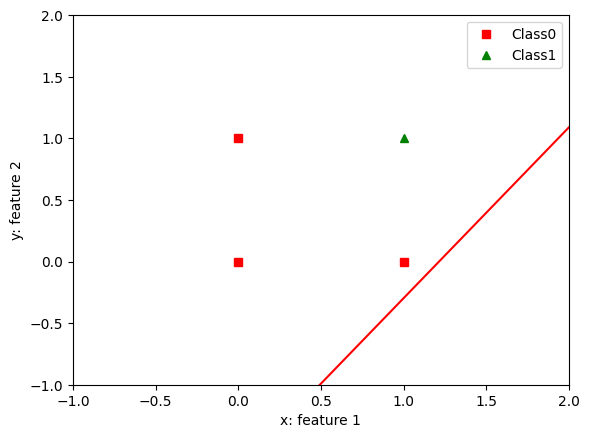

iteration #5


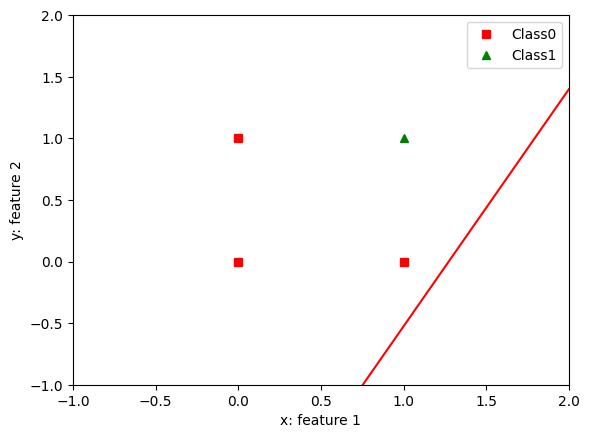

iteration #6


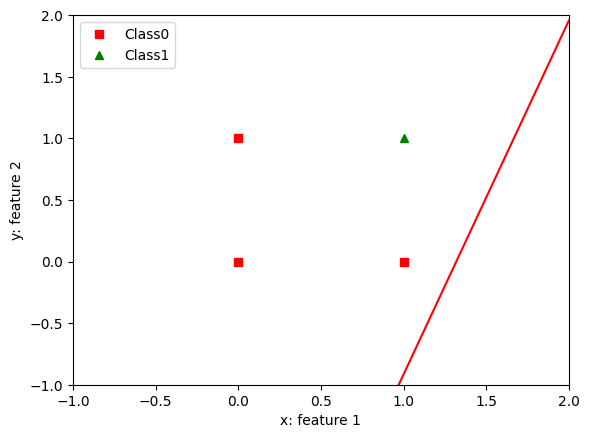

iteration #7


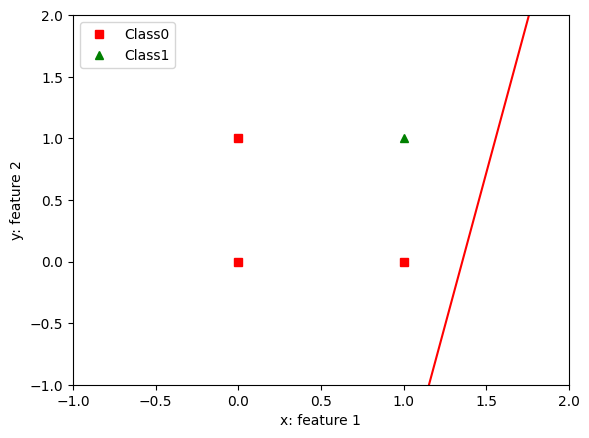

iteration #8


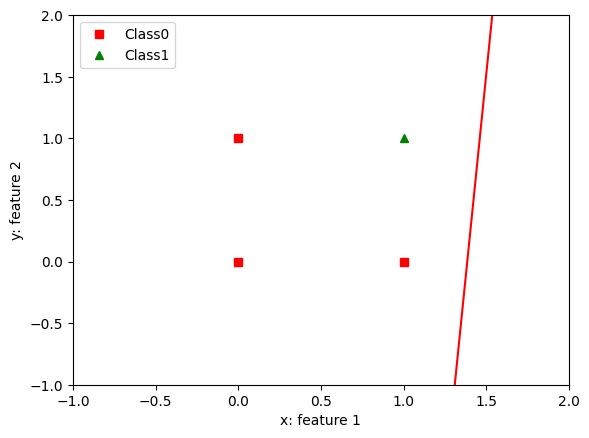

iteration #9


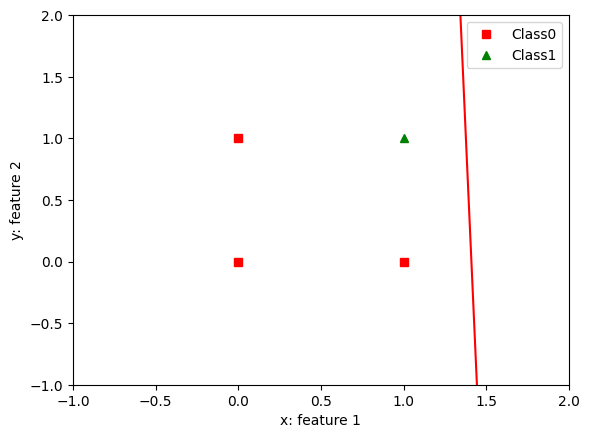

iteration #10


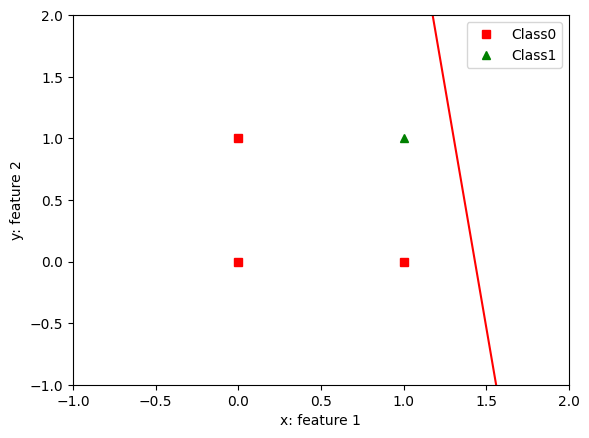

iteration #11


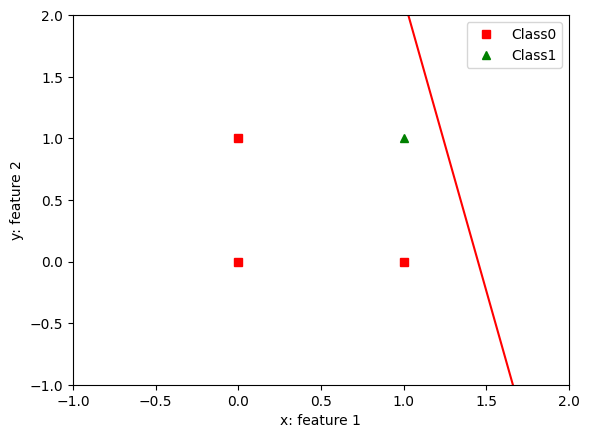

iteration #12


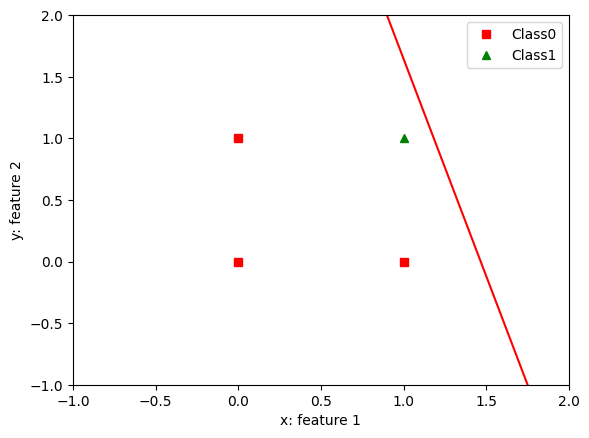

iteration #13


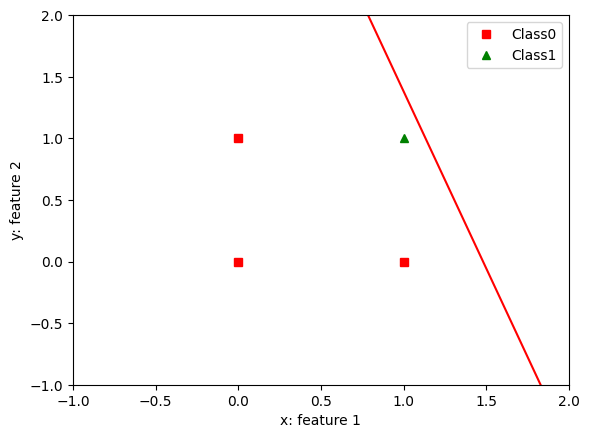

iteration #14


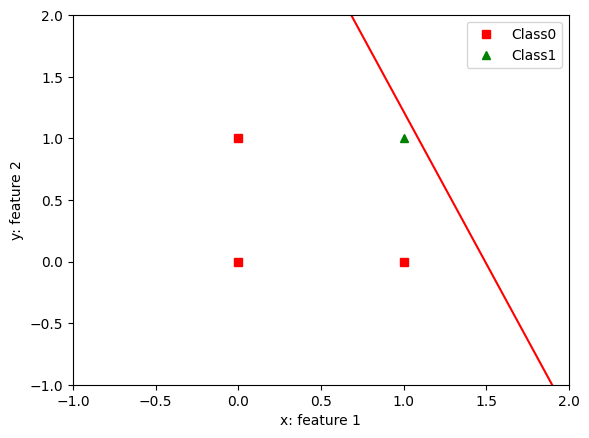

iteration #15


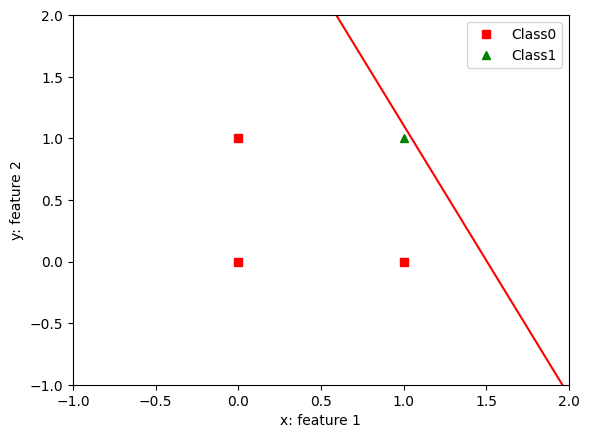

iteration #16


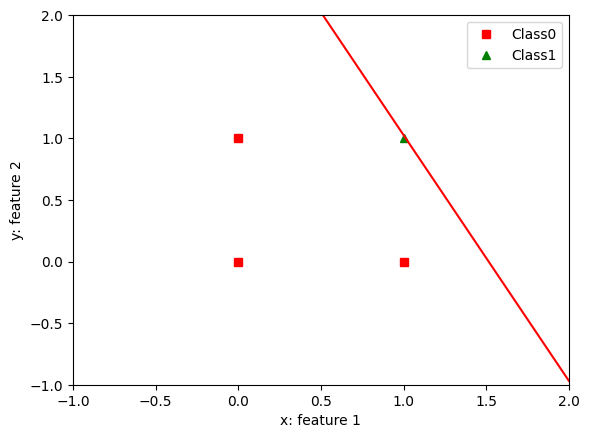

iteration #17


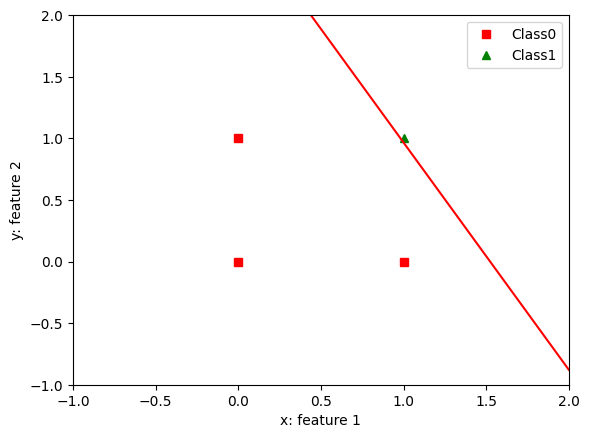

iteration #18


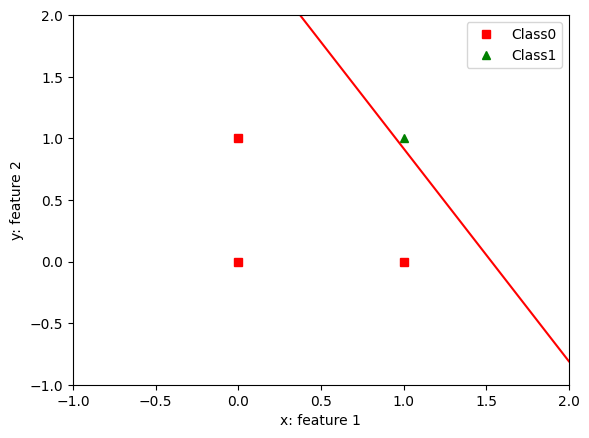

iteration #19


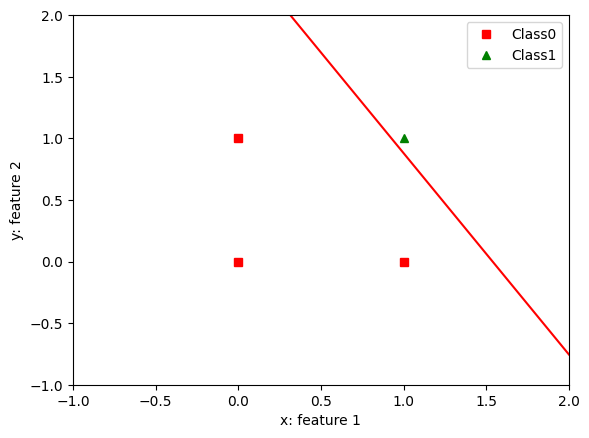

iteration #20


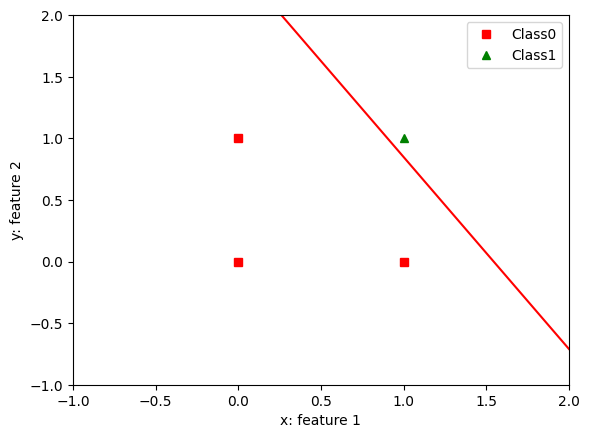

iteration #21


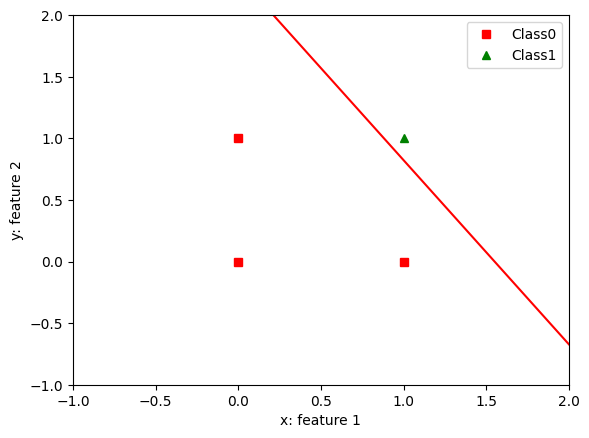

iteration #22


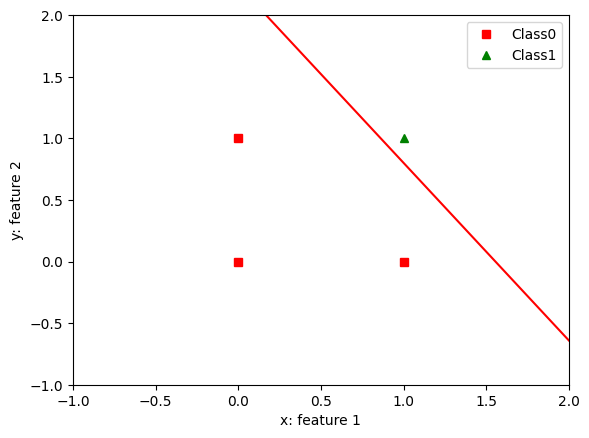

iteration #23


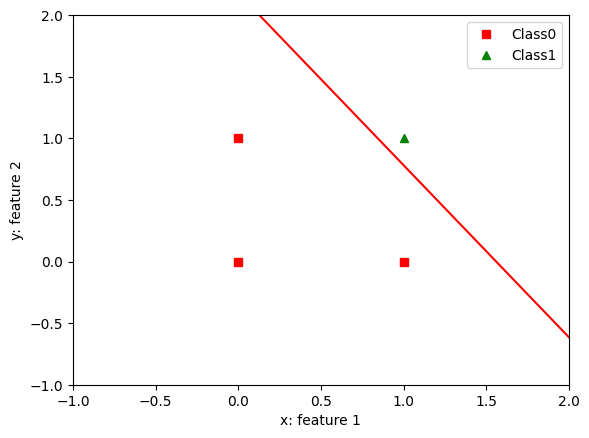

iteration #24


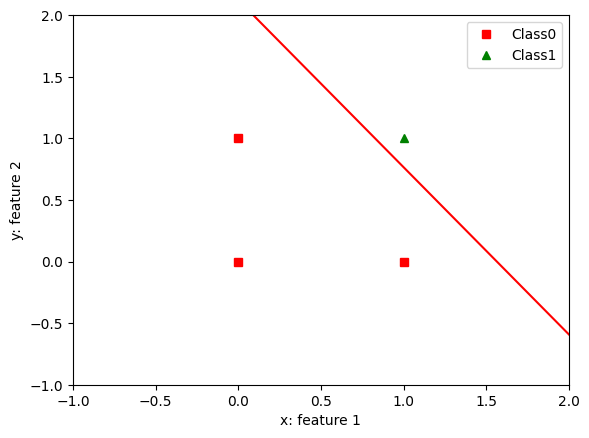

iteration #25


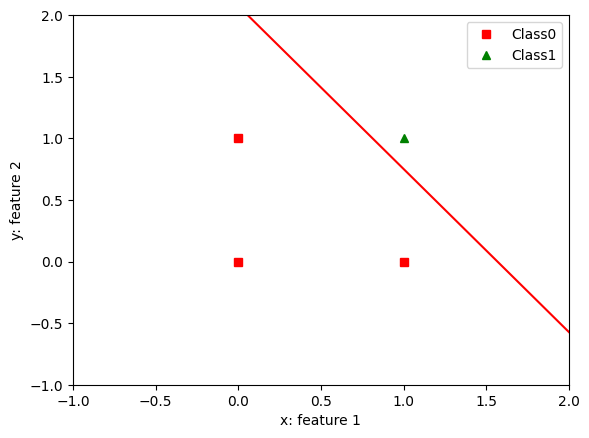

iteration #26


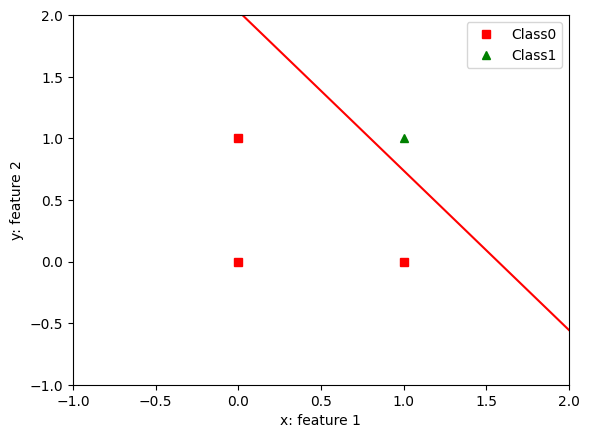

iteration #27


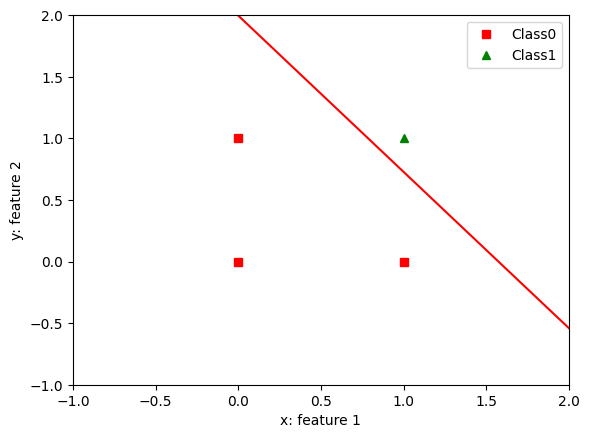

iteration #28


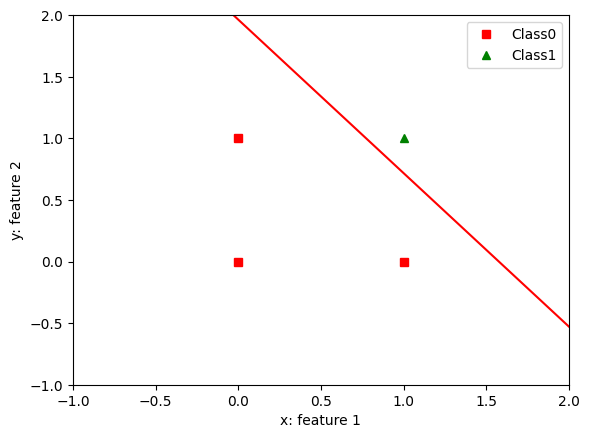

iteration #29


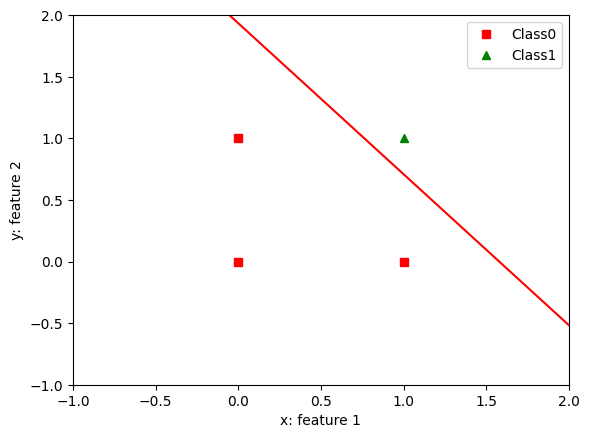

iteration #30


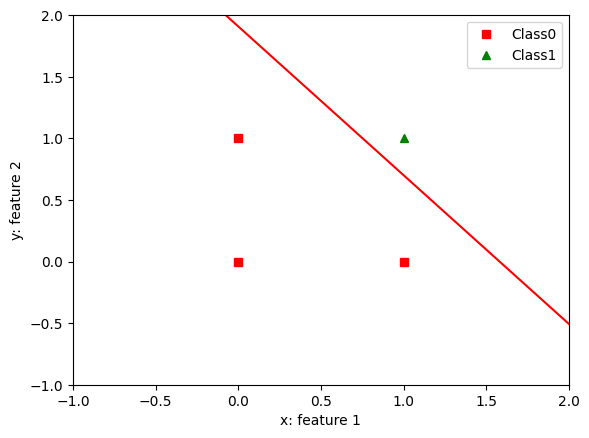

iteration #31


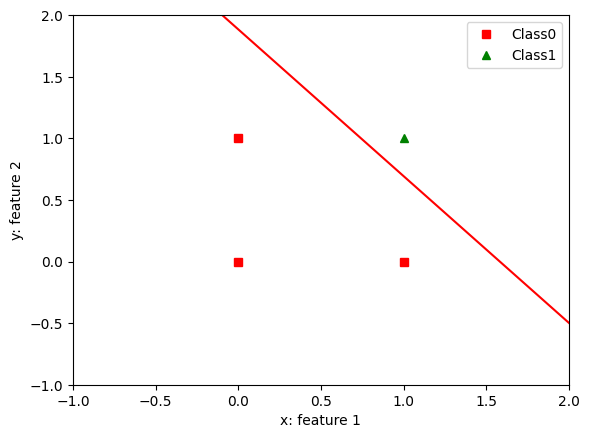

iteration #32


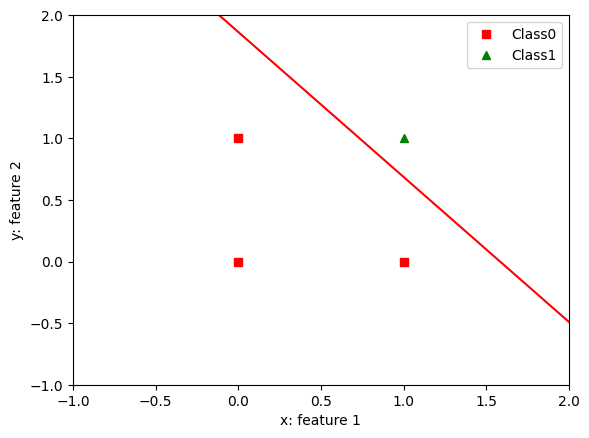

iteration #33


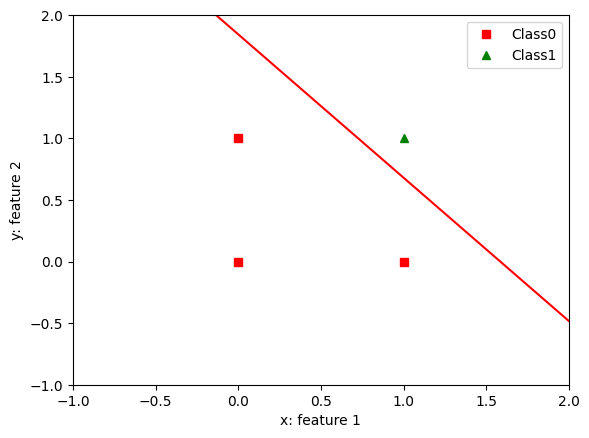

iteration #34


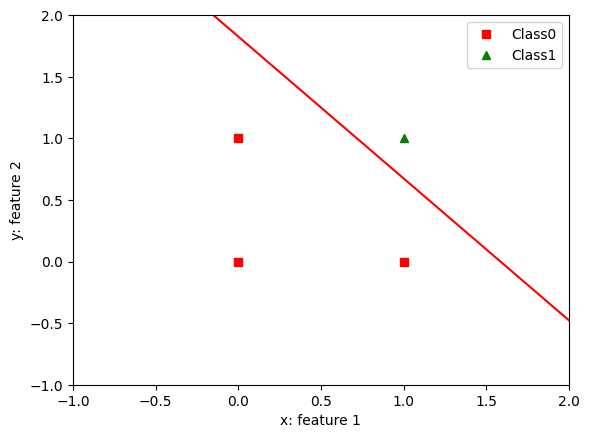

iteration #35


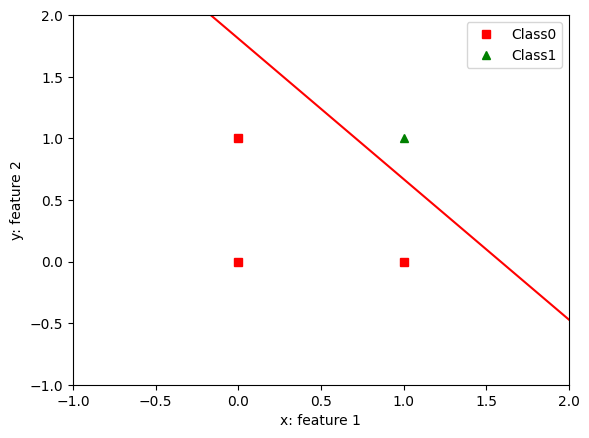

iteration #36


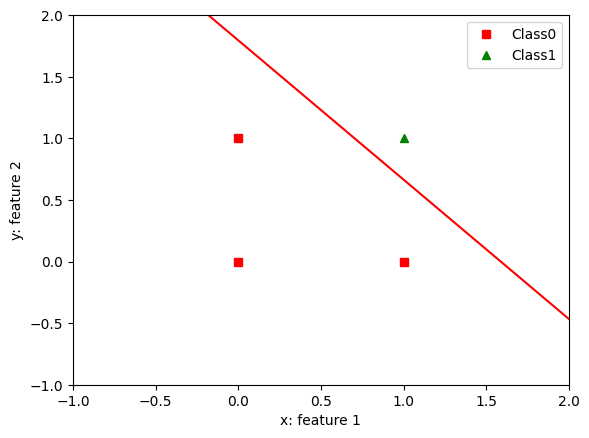

iteration #37


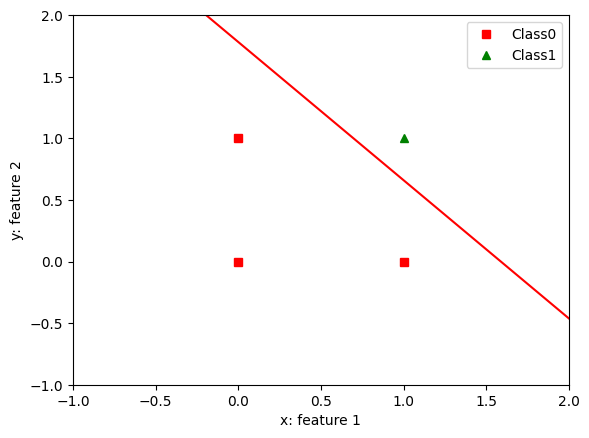

iteration #38


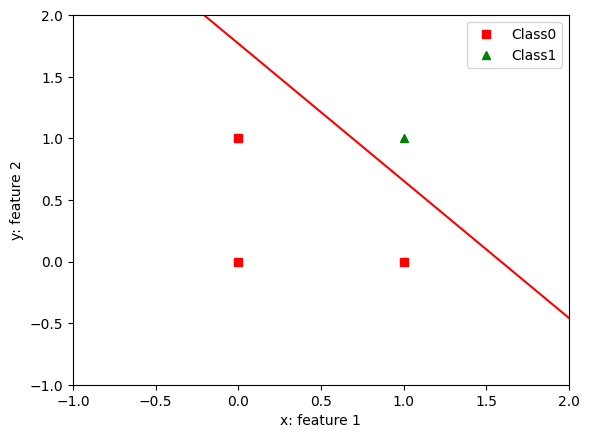

iteration #39


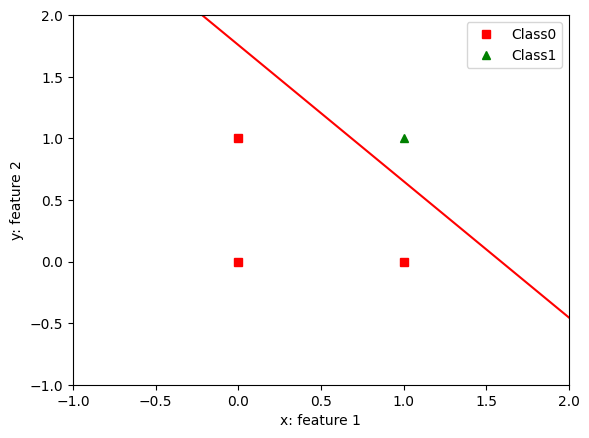

iteration #40


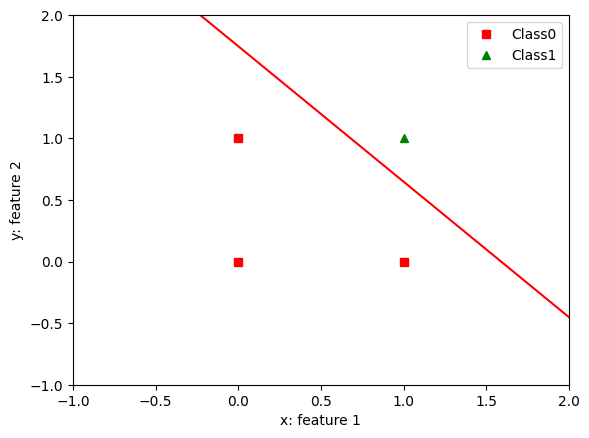

iteration #41


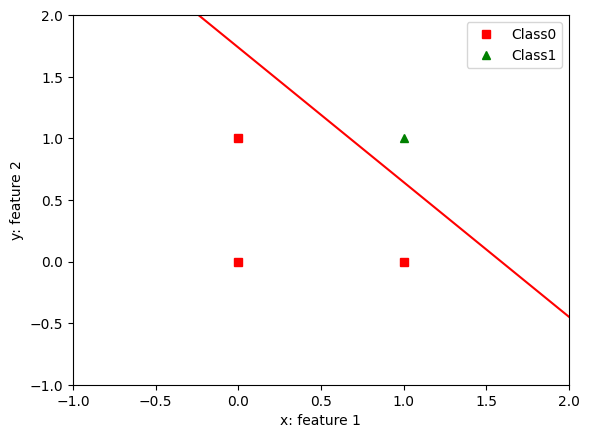

iteration #42


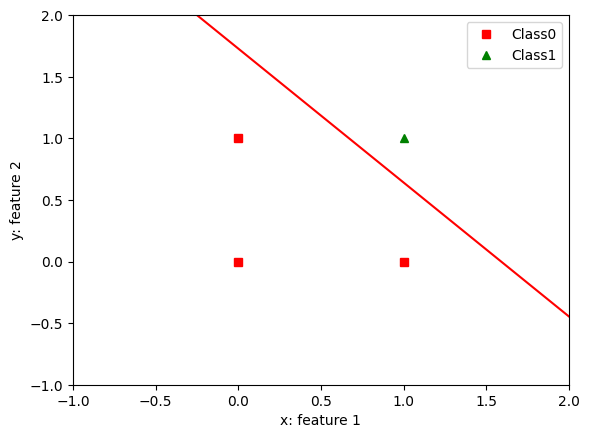

iteration #43


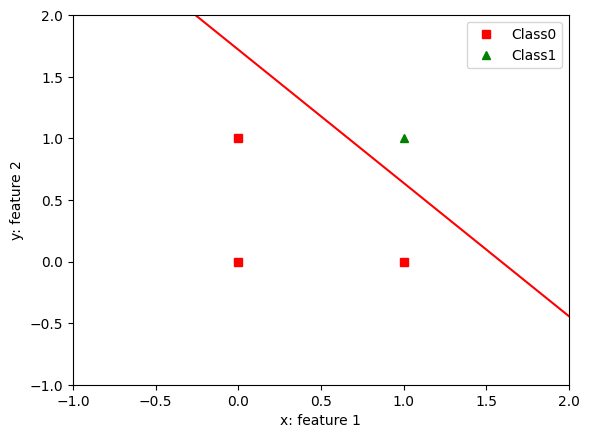

iteration #44


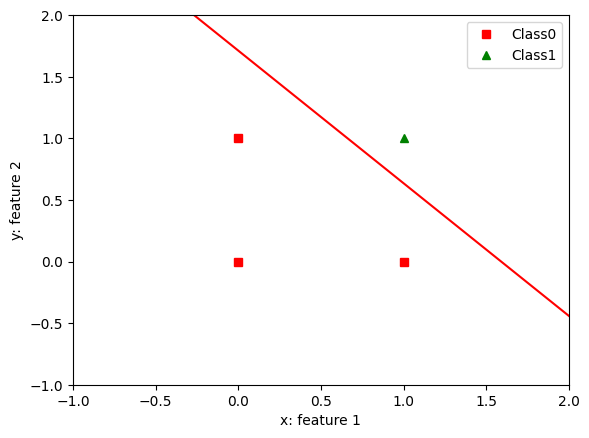

iteration #45


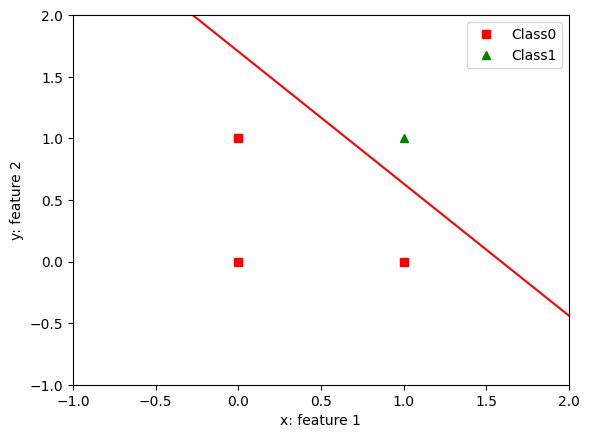

iteration #46


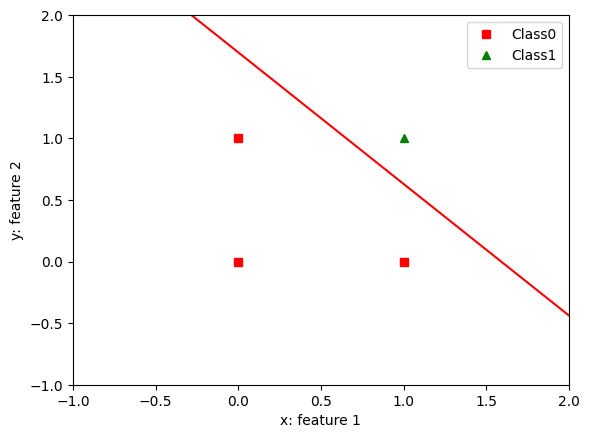

iteration #47


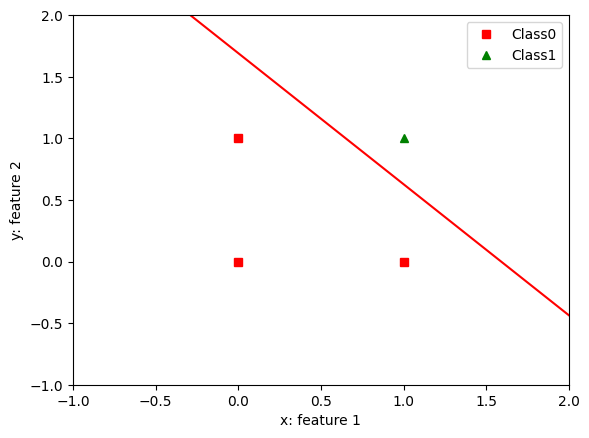

iteration #48


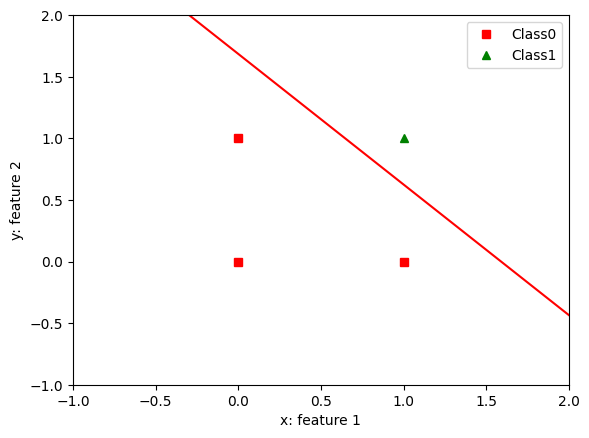

iteration #49


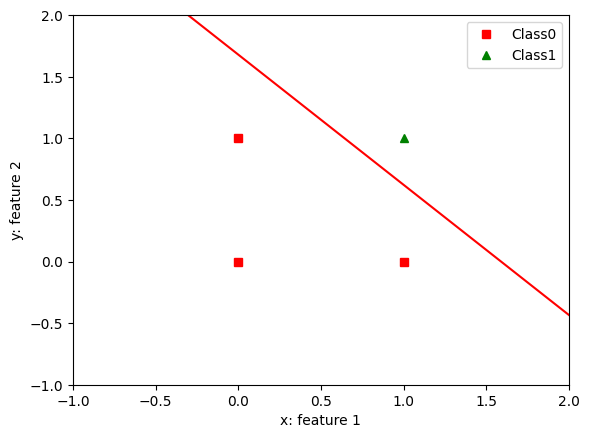

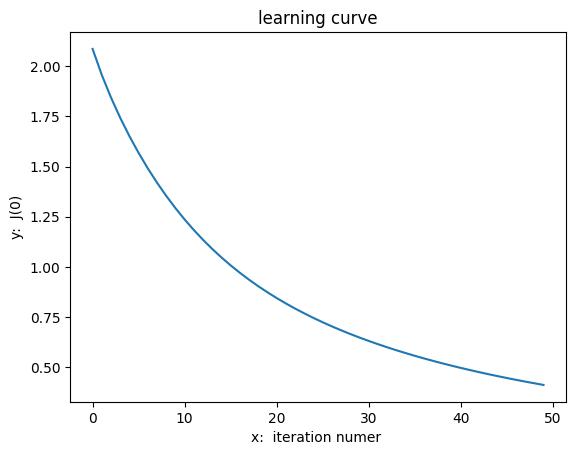

New weights after training 
[[-3.29166486]
 [ 2.07107098]
 [ 1.95977558]]
testing network on training data points ->
[[0]
 [0]
 [0]
 [1]]
testing network on new examples
[1]


In [64]:
neural_network = NeuralNetwork()
print('Random weights at the start of training')
print(neural_network.weight_matrix)
neural_network.train_GDL(features,np.expand_dims(labels,axis=1),50)

print('New weights after training ')
print(neural_network.weight_matrix) 

#test the neural network with training 
print('testing network on training data points ->')
print(neural_network.pred(features))

#testing the neural network with a new data point 
print("testing network on new examples")
print(neural_network.pred(np.array([1,1,1])))